In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

In [2]:
import numpy as np
from tensorflow.keras import utils, layers, models
import matplotlib.pyplot as plt
!unzip /content/drive/MyDrive/Fruits_Vegetables_Recognition/data.zip -d /content/

Archive:  /content/drive/MyDrive/Fruits_Vegetables_Recognition/data.zip
  inflating: /content/test/apple/Image_1.jpg  
  inflating: /content/test/apple/Image_10.jpg  
  inflating: /content/test/apple/Image_2.jpg  
  inflating: /content/test/apple/Image_3.jpg  
  inflating: /content/test/apple/Image_4.jpg  
  inflating: /content/test/apple/Image_5.jpg  
  inflating: /content/test/apple/Image_6.JPG  
  inflating: /content/test/apple/Image_7.jpg  
  inflating: /content/test/apple/Image_8.jpg  
  inflating: /content/test/apple/Image_9.jpg  
  inflating: /content/test/banana/Image_1.jpg  
  inflating: /content/test/banana/Image_10.jpg  
  inflating: /content/test/banana/Image_2.jpg  
  inflating: /content/test/banana/Image_3.jpg  
  inflating: /content/test/banana/Image_4.jpg  
  inflating: /content/test/banana/Image_5.jpg  
  inflating: /content/test/banana/Image_6.jpg  
  inflating: /content/test/banana/Image_8.jpg  
  inflating: /content/test/banana/Image_9.jpg  
  inflating: /content/te

In [3]:
model = models.load_model('/content/drive/MyDrive/Fruits_Vegetables_Recognition/best_model.keras')

In [14]:
test_set = utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    interpolation="bilinear"
)

normalization_layer = layers.Rescaling(1./255)
test_data = test_set.map(lambda x, y: (normalization_layer(x), y))

Found 359 files belonging to 36 classes.


In [15]:
test_loss,test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9544 - loss: 0.2507
Test accuracy: 0.9499


In [23]:
img_path = '/content/test/apple/Image_1.jpg'

img_orig = utils.load_img(img_path)
img = utils.load_img(img_path, target_size=(64, 64))
img_array = utils.img_to_array(img)
img_array = np.array([img_array])
img_array = img_array / 255.0

pred = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


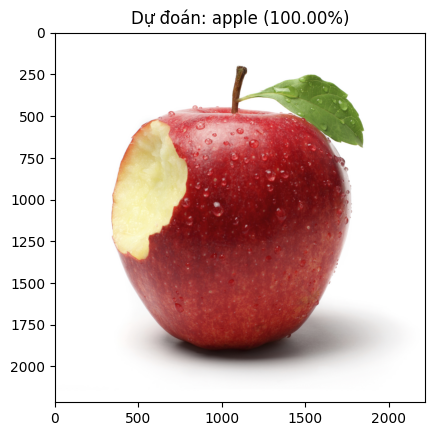

In [24]:
predicted_index = np.argmax(pred[0])

class_names = test_set.class_names
predicted_label = class_names[predicted_index]

plt.imshow(img_orig)
confidence = 100 * np.max(pred[0])
plt.title(f'Dự đoán: {predicted_label} ({confidence:.2f}%)')
plt.show()